In [1]:
from IPython.display import Image
img = 'Logo1.png' 
Image(url=img, width=800, height=100)

# Introduction

In March 2016, the 47th session of the United Nations (UN) Statistical Commission was organized to develop a framework to conquer the biggest global challenges of the world. During this session the global indicator framework was developed by the Inter-Agency and Expert Group on Sustainable Development Goal Indicators (IAEG-SDGs) and agreed to as possible working tool (DESA, 2018). 

This framework include “The Sustainable Development Goals”, which are the blueprint to achieve a better and sustainable future for every individual worldwide. The blueprint include 17 goals that cover the global challenges and are interrelated. The main goal is to leave no individual behind. The formulation of several sub-goals within these 17 goals provide specific targets. These targets must be achieved by 2030 (United Nations, 2018). 

Every year, the status of progression considering the goals is reviewed according to the most up to date data available. The highlights of these data considering progression and remaining gaps were reported in  “The Sustainable Development Goals Report 2018”. In addition the interconnections across goals and targets are examined. In the report of 2018 the main conclusion was that people worldwide have a higher quality of life compared with a decade ago. However, the process on targets to make sure that no individual is left behind is lacking to meet the targets of 2030, which is a  disturbing conclusion (United Nations, 2018b).

One of these target goals is about gender equality. Goal five wants to end all forms of discrimination against women and girls. This is not only a basic human right but will also help drive up economic growth and development across the boards (UNDP, 2018). There are still huge inequalities between men and women.

Globally, women earn only 77 cents for every dollar a man earns for doing the same work, less than 20% of the world's landholders are women, 7 in 10 women in the world experience physical and/or sexual violence at some point in their life’s and only 22.8% of all national parliamentarians were woman in 2016. However,  that's not all, still 750 million women and girls who are alive today were married before their 18th birthday (UNDP, 2018).

Child marriage is the third sub-goal of the gender equality goal. it states: *"Eliminate all harmful practices such as child, early and forced marriage and female genital mutilation"*

The target is to bring the proportion of women aged 20-24 years who were married or in a union before age 15 and before age 18 to zero (DESA, 2018). 193 countries now, have agreed to end child marriage by 2030. Until than 12 million girls are married before their 18th birthday every year (Girls not Brides, 2018).

This target has not only effect on the gender equality target goal, but it is also represented in seven other goals. Child marriage also influences goal one: no poverty, goal two: zero hunger, goal three: good health and wellbeing, goal four: inclusive and quality education, goal eight: economic growth, goal ten: reduce inequalities and goal 16: peace, justice and strong institutions (Girls not Brides, 2018). If child marriage is not eliminated, these goals will not be achieved.

Concluded that child marriage has to end, will it actually help to reach gender equality? This research paper will analyse the different goals and assess if there is a correlation between child marriage and the aforementioned  inequalities. The research question will be: *" Will ending child marriage contribute to gender equality"?*

Because gender inequality occurs in many topics and literature research has revealed that ending child marriage will help stimulate gender equality in multiple of these topics, this researchpaper will be analysing different topics in relation with gender equality. Also the differences between women and men are analysed. If there is a clear difference between men and women or a positive relation with gender equality, the assumption can be made that ending child marriages, will contribute to more equality.

This will be done by visualising the data in a variety of plots and interpreting these plots in relation with literature. First the general functions and code will be discussed. Second, an overview of the Gender Equality Index (GEI) per country will be given. Next, the GEI will be compared with the GDP of the different countries. After that, the inequalities in education will be discussed. Followed by a an analysis about healthcare differences between men and women. Then, child marriage can be viewed. Last, a conclusion will be given followed by a discussion with recommendations for further research and notes about this research.

# 1. General functions and code

Before the data can be analysed, there are some general steps to be taken. Because these things are necessary in multiple questions and lines of code, these functions are made and listed beneath. In the chapters the needed function will be called and a reference to the general function will be given. 

### 1.1 Libraries
First all needed libraries are called, then the additional used data from another source than World Bank is described and last the functions are created.

In [2]:
#All necessary libraries 

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wbdata
import json
import requests
import pycountry
from scipy import stats
from bs4 import BeautifulSoup
import seaborn as sns

### 1.2 Data Generation

For this research report mainly data from the World Bank database is used. wbdata is the data from the World Data bank and is an interface in python to request data from the World bank database. Through the following two steps the wanted data is found. 

In [3]:
# Shows all available wb datasets in python
wbdata.get_source()

#Shows all indicators in the choosen dataset 
wbdata.get_indicator(source=16)


11	Africa Development Indicators
36	Statistical Capacity Indicators
31	Country Policy and Institutional Assessment
41	Country Partnership Strategy for India (FY2013 - 17)
1 	Doing Business
30	Exporter Dynamics Database ��� Indicators at Country-Year Level
12	Education Statistics
60	Economic Fitness
13	Enterprise Surveys
28	Global Financial Inclusion
33	G20 Financial Inclusion Indicators
14	Gender Statistics
15	Global Economic Monitor
27	Global Economic Prospects
32	Global Financial Development
34	Global Partnership for Education
29	The Atlas of Social Protection: Indicators of Resilience and Equity
63	Human Capital Index
16	Health Nutrition and Population Statistics
39	Health Nutrition and Population Statistics by Wealth Quintile
40	Population estimates and projections
62	International Comparison Program (ICP) 2011
18	IDA Results Measurement System
45	Indonesia Database for Policy and Economic Research
6 	International Debt Statistics
54	Joint External Debt Hub
25	Jobs
37	LAC Equity La

For this research, the data from the World Bank (wbdata) wasn't sufficient to analyse our sub-questions. Because of this data from the Organisation for Economic Cooperation and Development(OECD) databank is used. Beneath a short explanation of how the necessary data frame is created will be given.

The website BeautifulSoup is used to retrieve additional data from the website of OECD. Next, List comprehension and 'soup.find_all' is used to create lists in order to make a data frame. After that a new list is made with the countries from old list: 'list_country' but with converted ISO-two digit country code to ISO-three digit country code.
After this the  data frame can be created. Last, the type of the column 'value' is changed into a float and  added a more clear value to the column 'indicator'. Also the value in the column "value" is multiplied by 100 to show the percentage and to make it comparable with the data from the World Bank.

In [4]:
#Step 1: retrieving additional data
response = requests.get('https://stats.oecd.org/restsdmx/sdmx.ashx/GetData/GIDDB2014/ALL.AUS+AUT+BEL+CAN+CHL+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ISL+IRL+ISR+ITA+JPN+KOR+LVA+LTU+LUX+MEX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA+NMEC+AFG+ALB+DZA+AGO+ARG+ARM+AZE+BHR+BGD+BLR+BEN+BTN+BOL+BIH+BWA+BRA+BGR+BFA+BDI+KHM+CMR+CAF+TCD+CHN+COL+COG+COD+CRI+CIV+HRV+CUB+CYP+DOM+ECU+EGY+SLV+GNQ+ERI+ETH+FJI+MKD+GAB+GMB+GEO+GHA+GTM+GIN+GNB+HTI+HND+HKG+IND+IDN+IRN+IRQ+JAM+JOR+KAZ+KEN+PRK+KWT+KGZ+LAO+LBN+LSO+LBR+LBY+MDG+MWI+MYS+MLI+MRT+MUS+MDA+MNG+MAR+MOZ+MMR+NAM+NPL+NIC+NER+NGA+PSE+OMN+PAK+PAN+PNG+PRY+PER+PHL+QAT+ROU+RUS+RWA+SAU+SEN+SRB+SLE+SGP+SOM+ZAF+LKA+SDN+SWZ+SYR+TJK+TZA+THA+TLS+TGO+TTO+TUN+TKM+UGA+UKR+ARE+URY+UZB+VEN+VNM+YEM+ZMB+ZWE.AIC.FC_2/all?startTime=2014&endTime=2014')
data = response.content
soup = BeautifulSoup(data, "lxml")
#print(soup)

#Step 2: Lists are created to make a dataframe
list_country = [x.get_attribute_list('value')[0] for x in soup.find_all("value", attrs={ "concept" : "LOCATION"})]
list_date = [x.text for x in soup.find_all("time")]
list_variable = [x.get_attribute_list('value')[0] for x in soup.find_all("value", attrs={ "concept" : "VAR"})]
list_value = [x.get_attribute_list('value')[0] for x in soup.find_all("obsvalue", attrs={ "value" : True})]

#Step 3: ISO-two digit countrycode convertion to ISO-three digit country code
new_countrylist = [ pycountry.countries.get(alpha_3=i).alpha_2 for i in list_country ]
# new_countrylist

#Step 4: Creating dataframe
OECD_df = pd.DataFrame({'country':new_countrylist,'date':list_date,'indicator':list_variable, 'value':list_value})
# OECD_df

#Step 5: Changing column values
OECD_df['value'] = OECD_df.value.astype(float).round(6)
OECD_df['value'] = OECD_df['value'] *100
OECD_df['indicator']= 'Percentage of women married between 15-19 years of age' 
OECD_df['date'] = OECD_df.date.astype(int)
# OECD_df

### 1.3 Functions

This function is for cleaning the data from the world Bank datasets. A data frame is created, the data in this frame will be cleaned. Then the earlier determined 15 countries with the worst gender equality rate are filtered from the data frame, combined with the years 2007 till 2017. Last the data frame will be sorted from worst to less bad and the missing data is filled in. 

In [5]:
def clean(dataset):
    #create data frame
    name = pd.DataFrame(wbdata.get_data(dataset))
    
    #clean the date
    name['country_code'] = name.country.astype(str).str.slice(8,10)
    name['country'] = name.country.astype(str).str.slice(23,-2)
    name['indicator'] = name.indicator.astype(str).str.slice(35,-2)
    name["date"] = name["date"].astype(int) 
    name["value"] = name["value"].astype(float).round(2)
    return name

This function fills in the missing data for a country based on the known values.

In [6]:
def fillna(name):
    for i in name.country.unique():
        name.loc[name['country'] == i]  = name.loc[(name['country'] == i)].ffill().bfill()
    return name

This function returns a data frame with only the selected range of years.

In [7]:
def getYears15(name):
    name.date = name.date.astype(int)
    years = name.loc[(name['date'] >= 2007) & (name['date'] <= 2017)]

    years_worst = years.loc[(years.country.isin(CPIA_worst15.country)),:]
    years_worst_sorted = years_worst.sort_values(by='date',ascending=True)
    
    return years_worst_sorted

### 1.4 Graph functions

This function is for making a line plot of certain dataframes. A linegraph shows how an indicator has changed over time for a particular country. 

In [18]:
def graph(dataframe, title_graph, x_label, y_label):
    fig,ax = plt.subplots(figsize=(30, 15))
    
    # Selects every country only once instead of every time.
    for name in dataframe["country"].unique(): 
        ax.plot(dataframe[dataframe.country==name].date, dataframe[dataframe.country==name].value,label=name)

    #change size and location of legend
    ax.legend(loc=(1.1, 0.2), fontsize = 'xx-large')

    #values of the x and y axis
    plt.xticks(rotation = 65, fontsize = 20)
    plt.yticks(fontsize = 20)

    #labels of the x and y axis 
    plt.title(title_graph, fontsize = 30)
    plt.xlabel(x_label, fontsize = 25)
    plt.ylabel(y_label, fontsize = 25)  

This function makes a scatterplot. A scatterplot shows if there is correlation between two indicators.

In [9]:
def makeScatter(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    
    #plot the scatter with line
    sns.regplot(x,y, color = 'orchid')
    
    #labels
    plt.xlabel(xlabel, fontsize = 20)
    plt.ylabel(ylabel, fontsize = 20)
    plt.title(title, fontsize = 25)
    plt.xticks(rotation = 65, fontsize = 15)
    plt.yticks(fontsize = 15)

This function makes a bar plot. A bar plot visualise the difference in value between countries.

In [10]:
def makeBarPlot(x, y, title_graph, xlabel, ylabel):
    #make array from the columns of the dataframe
    array1 = x.values
    array2 = y.values
    
    # colors for the bars
    colors = ["Red", "Blue", "Yellow", "Green", "Pink", "Cyan"]
    
    # set the cells that contain missing values at zero
    array2[np.isnan(array2)] = 0
    
    # plot the bar
    plt.figure(figsize=(30,10))
    plt.bar(array1, array2, color = colors, width = 0.8, align='center')

    plt.xticks(np.arange( len(array1) ), array1, rotation = 65, fontsize = 20)
    plt.yticks(fontsize = 20)
    
    # labels
    plt.title(title_graph, fontsize = 30)
    plt.xlabel(xlabel, fontsize = 25)
    plt.ylabel(ylabel, fontsize = 25)
    
    # Get the value of the bar on top of the bar
    for (i, value) in enumerate (array2):
        plt.text(i- 0.4 , value, "%.2f" % (value) , fontsize = 20)

This function makes a stacked bar plot. A stacked bar plot visualises the difference between two groups.

In [ ]:
def makeStackedBarPlot(dataframeMale, dataframeFemale, title_SBP, x_label, y_label):
    Male = dataframeMale.value_y.values
    Female = dataframeFemale.value_y.values
    Countries = dataframeMale.country.values
    
    N = len(Countries) #setting x axes
    ind = np.arange(N) 
    width = 0.4        #width of the bars
    
    #Making the bars for Male and Female
    p1 = plt.bar(ind, Male, width, label = 'Male', color='blue')
    p2 = plt.bar(ind, Female, width, bottom=Male, label = 'Female', color='pink')
    
    plt.xticks(ind, Countries, fontsize = 10, rotation = 60) #naming the bar
    plt.ylabel (y_label)
    plt.xlabel (x_label)
    plt.title (title_SBP)
    
    plt.legend()
    plt.show()
    

#  2. How equal are genders around the world?

Before the research question can be analysed, an understanding of the problem is needed. Because in some countries genders are far more equal than in others. To map the gender equality per country, the European Institute for Gender Equality (EIGE) came up with a Gender Equality Index (GEI). This unique tool measures how far (or close) the EU and its Member States are from achieving a gender-equal society (EIGE, n.d.). The Index is based on topics as work, money, knowledge, time, power and health. This index is a good starting point for analysing the problem.

Gender equality rate van alle landen
Introductie wat er in dataset staat.

Visualiseren:
- World map
- Histogram

De gemiddelde gender equality rate van elk jaar berekenen en die plotten. Vervolgens die lijn extrapoleren om te kijken of het doel in 2030 wordt gehaald. 

To take all countries in the world into account is a lot and this research paper would become to big. For that reason the decision was made to scope the problem and look at the most interesting countries, the countries who have to do the most to reach the goal of gender equality in 2030. Based on the GEI the 15 countries with the worst rating are selected. These countries will be analysed throughout the rest of this paper. 

These 15 countries with the lowest GEI, are combined in a data frame. This way, the same countries can be used for the other sub questions. Not all data is available for every country. There is some missing data in the dataset. The data missing is filled in with a general function "fillna". This function is described in paragraph 1.3 *General functions*

In [11]:
CPIA_all = clean("IQ.CPA.GNDR.XQ")
#CPIA_all = fillna(CPIA_all)

# Filter the dataset on year and on country code which are not numeric
CPIA_all_year_alpha = CPIA_all.loc[(CPIA_all['date'] == 2017) & (CPIA_all.country_code.str.isalpha())]
CPIA_OnlyCountries = CPIA_all_year_alpha[17:]

#sort the countries by 'value' (their rating) and only show the Top 15
CPIA_worst15 = CPIA_OnlyCountries.sort_values(by='value', ascending=True)[:15]

# 3. What is the relation between Gross Domestic Product of a country and the Gender Equality Index?

In this chapter the relation between Gross Domestic Product (GDP) and the Gender Equality Index (GEI)will be discussed. An assumption broad accepted states that: the economic welfare of a country has a big impact on social problems such as gender equality. If a country has a higher GDP, there is more to invest in the social growth of a country. Countries who need to focus on primary needs, will worry less about social problems such as gender equality. 

To check this assumption, the correlation between GDP and the GEI will be calculated through a scatterplot with regression line. How the scatterplot is made, will be explained in paragraph 1.4 *Graph functions*. But before the scatter is made, the available data is examined. A bar plot of the GDP of the 15 countries who scored lowest on the GEI is visualised per country. The function for making the bar plot is also described in paragraph 1.4 *Graph functions*. Next the change in GDP over time in showed in a line graph. The function of the line graph is also described in paragraph 1.4 *Graph functions*. 

The data visualised in the different plots show how the countries have developed over time. A feeling how they evolved will be created and give a view on the future. If the economy is flourishing, chances are the social problems will also become more priority. If there is a correlation between these two indicators. If there is not a correlation growing economy will not lead to more gender equality.

### 3.1 Creating a dataframe of the needed data

Before the plots can be created, the right data need to be selected. The World Bank dataset provides a lot of sources and indicators. How these indicators and sources are chosen can be read in paragraph 1.2 *Data generation*. 

The "clean" and "fillna" function from paragraph 1.3 are used again to make a dataframe from the Gross Domestic Product (GDP) data. After that a dataframe with only the most recent data is created. This dataset is scaled to only the 15 countries with the lowest GEI.

Because the missing data in the World Bank data sets is filled in by the "fillna" function, there is a little uncertainty in the data. This need to be taken into account during reviewing the analysis. The overall conclusions will be reliable because it only counts for a few data points, but even it is for a few points it brings some uncertainty.

In [12]:
# Make a dataframe from the GDP data
GDP_all = clean("NY.GDP.PCAP.CD")
GDP_all = fillna(GDP_all)

# Make the value in the column "date" a string
GDP_all["date"] = GDP_all.date.astype(str)
CPIA_worst15["date"] = CPIA_worst15["date"].astype(str)

In [13]:
# Make a dataframe which contains the most recent values of GDP of every country

GDP_now = GDP_all.sort_values("date", ascending = False).drop_duplicates(["country"])

# Make a new dataframe of the 15 countries with the worst equality rating in combination with the GDP data
GDP_worst15 = pd.merge( CPIA_worst15, GDP_now, how = "left", left_on = ["country", "date"], right_on = ["country", "date"])

# missing data!

### 3.2 Gross Domestic Product of the 15 countries with the lowest Gender Equality Index

The bar plot is made by the function "makeBarPlot". This function is described in paragraph 1.4 *Graph functions*. The graph shows Gross Domestic Product (GDP) in US dollars per country. PPP stands for purchasing power parity. This means the value of all final goods and services produced within a country in a given year, divided by the average (or mid-year) population for the same year (Hall, 2018). 

The bar plot shows a with range of variety in GDP's. Most countries have a relatively low GDP. Two countries, Micronesia and Sudan, have a much higher GDP than the rest. Pakistan and Kribati are in the middle range. The other countries are low. With South Sudan and Niger at the bottom. 

EXPLANATION ABOUT THE OUTSTANDING VALUES

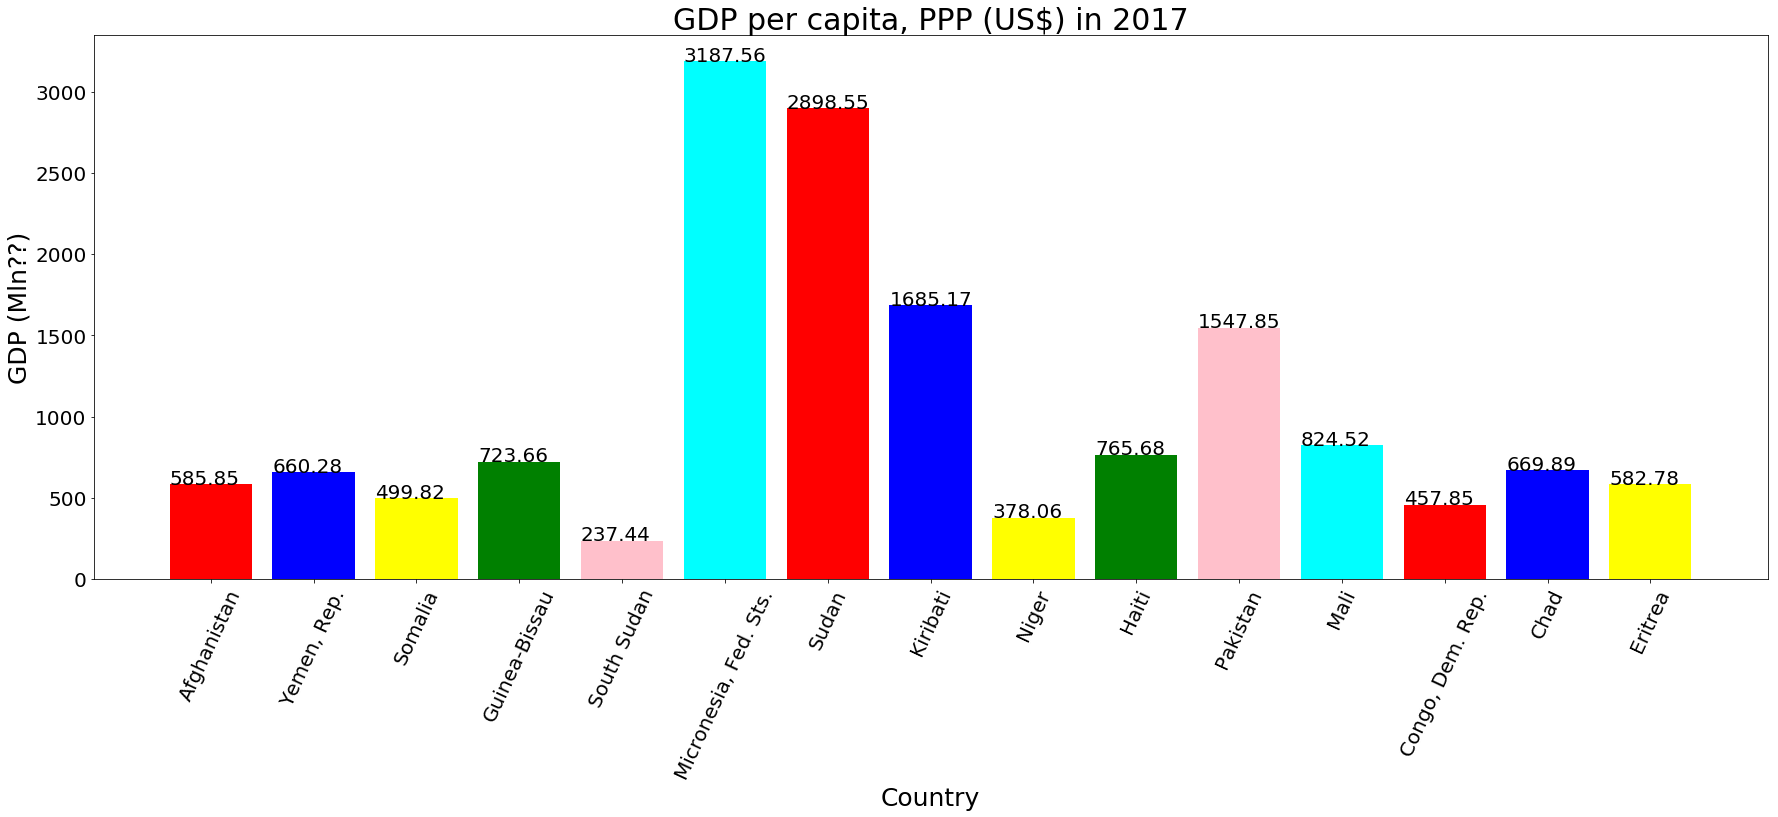

In [20]:
makeBarPlot(GDP_worst15['country'], GDP_worst15['value_y'], "GDP per capita, PPP (US$) in 2017", "Country", "GDP (Mln $??)")

### 3.3 Change in Gross Domestic Product over the years of the 15 countries with the lowest Gender Equality Index

The change in Gross Doemstic Product (GDP) is shown in a line plot. This plot is made by the function "getYears15". This function is explained in paragraph 1.3 *General functions*. Through this function a data frame is created for GDP per country about a certain time period. This timeframe is 2007 till 2017. In a period of ten years the changes in GDP per country are more clear than in a short period of time. Over ten years it is more clear if a country has an increasing or decreasing GDP. This way assumptions about the future can be made. Supposed the trend shown in the graph will continue. If this trend already continues for ten year, the assumption it will continue is more plausible. The GDP is in US dollars per country. 

There are a lot of lines but the core messages of the plot are for most countries the GDP is stable. Around 2014 and 2015 the most countries had a decrease in GDP. This can be related to the financial crisis worldwide (Gandel, 2013). After 2014 most countries are slowly increasing their GDP again. Two countries show an odd graph, Haiti and South Sudan. Haiti’s GDP is severely impacted by the natural disasters that stroke the country since 2010 (Kenney, 2010). For South Sudan the economic performance is strongly depending on oil. The combination of the sharp drop in oil prices and the reduction in oil production followed by the ongoing civil war sharply reduced the GDP over the last years (African Development Bank, n.d.).

Micronesia and Chad are increasing the fastest. Chad started of relatively low but is now the second best of these countries. The economy is flourishing. Micronesia started relatively high and keeps growing. Other countries stay stable and show a little increase in GDP.

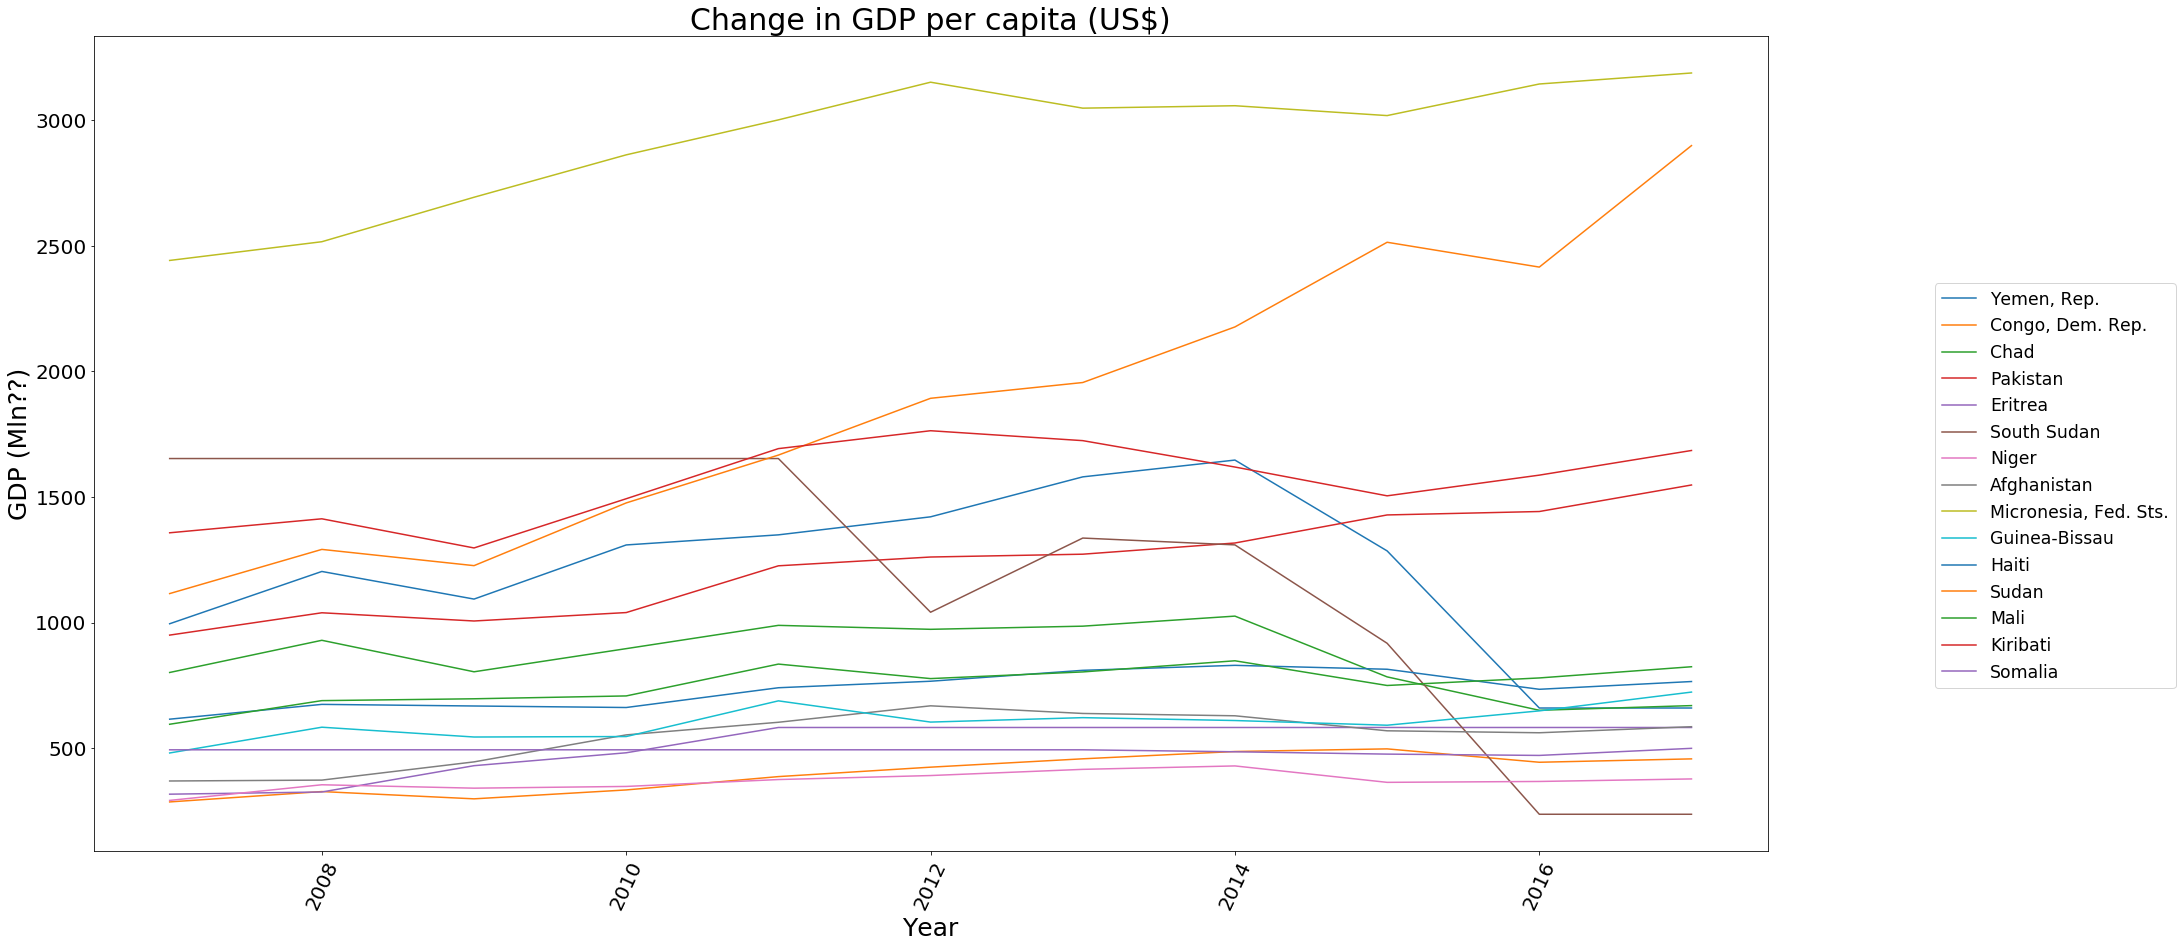

In [19]:
# Create the dataframe of the GDP of the 15 countries over the years 2007 till 2017
GDP_years = getYears15(GDP_all)

# Plot of the GDP over the years
graph(GDP_years, "Change in GDP per capita (US$)", "Year", "GDP (Mln $??)")

### 3.4  The correlation between Gross Domestic Product and the Gender Equality Index

The Gross Domestic Product (GDP) per country is evaluated over a range of time and the countries are compared with their current GDP. Now the general view on the GDP of the 15 countries with the lowest score on the Gender Equality Index (GEI) is formed, the correlation between the GDP and the GEI can be established. GDP is shown in US dollars.

The correlation is checked with a scatterplot. The function "makeScatter" is used, this function is defined in paragraph 1.4 *Graph functions*. In a scatterplot the dots are the data of the countries. They have a value for GDP and for the GEI, at the point where these values cross eachother the dot is placed. The line shows where the most point center around, it shows the mean. If mostt dots are around the line, a correlation can be assumed. 

In the scatterplot, a clear concentration of dots around the line can be established. There are a few outliers in the upper right corner of the graph. Keeping the graphs of the earlier paragraphs in mind, these probably are from Micronesia, Sudan and Chad (?? check with chapter 2).

From the scatterplot can be assumed that there is a correlation between GDP and the GEI.

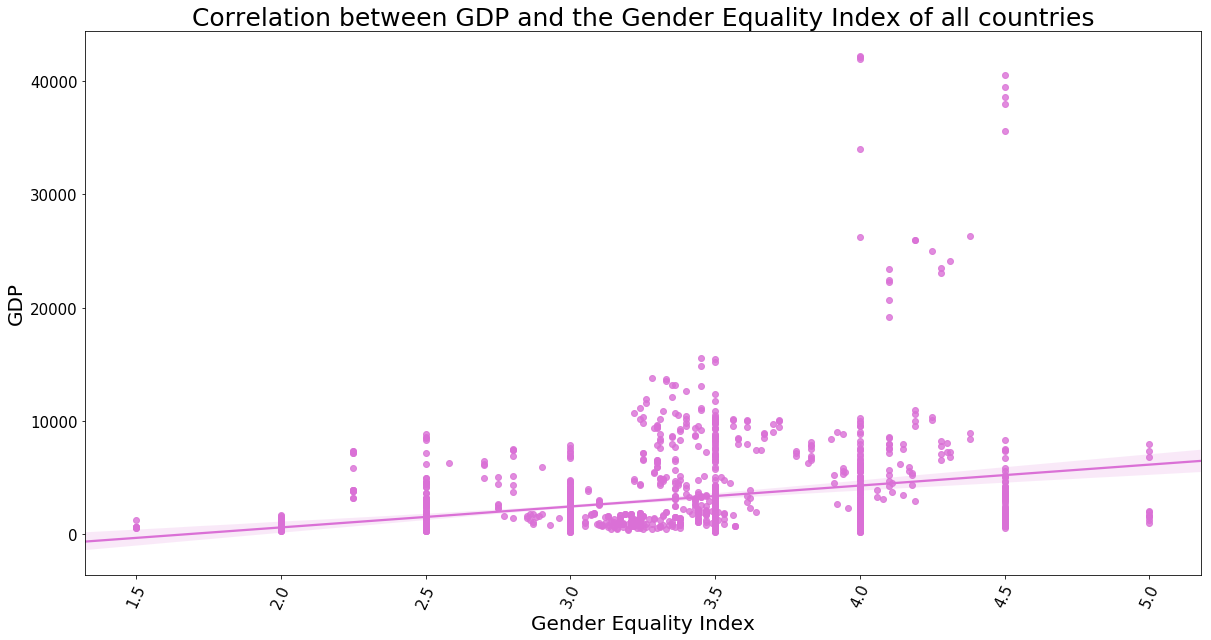

In [21]:
makeScatter(CPIA_all['value'],GDP_all['value'], "Correlation between GDP and the Gender Equality Index of all countries",
            'Gender Equality Index', "GDP (Mln $ ??)")

### 3.5 Conclusion

In this chapter the Gross Domestic Product (GDP) of the 15 countries with the lowest Gender Equality Index (GEI) is analysed. First the countries are compared in the same year, 2017. Here, a difference in GDP is clearly visible. However, most of the countries have a relatively low GDP.

Next the GDP per country is visualised over a period of ten years. For most countries there was not a big increase in GDP over the years, the GDP increased a little but stayed mostly stable. Around 2014 and 2015 a drop in GDP was visible for all the countries, due to worldwide economic crisis. A few countries showed a clear increase in GDP. Micronesia was in both plots a high outlier. The economy is clearly flourishing, but they are still with the 15 countries that have the lowest GEI. This country is an exception on the assumption of correlation between GDP and gender equality.

Last the correlation is analysed. This plot shows that there is a correlation between the two indicators but there are a few outliers in the upper right corner.


# 4. What are the inequalities in education between men and women?

Intro

Welke indicator wordt hier gebruikt? Wat is de data die beschikbaar is? Missing data? Op welke manier wordt de value gegeven? In percentages, absolute aantallen?

Verschil tussen mannen en vrouw in education. Dit visualiseren met behulp van een bar plot waar bars bovenop elkaar worden geplot. 

Grafiek van de verandering ontwikkelingen over de jaren heen per land. Met een lijn van man en een lijn van vrouw

subconclusion

In [ ]:
# make a dataframe from the indicator of gender equality rate
CPIA_all = clean("IQ.CPA.GNDR.XQ")

# Filter the dataset on year and on country code which are not numeric
CPIA_all_year_alpha = CPIA_all.loc[(CPIA_all['date'] == 2017) & (CPIA_all.country_code.str.isalpha())]
CPIA_OnlyCountries = CPIA_all_year_alpha[17:]

#sort the countries by 'value' (their rating) and only show the Top 15
CPIA_worst15 = CPIA_OnlyCountries.sort_values(by='value', ascending=True)[:15]

In [ ]:
# Make a dataframe from the GDP data
GDP_all = clean("NY.GDP.PCAP.CD")

# Make the value in the column "date" a string
GDP_all["date"] = GDP_all.date.astype(str)
CPIA_worst15["date"] = CPIA_worst15["date"].astype(str)

In [ ]:
# Make a dataframe from the indicators data
Primary_School_Male = clean ('SE.PRM.NENR.MA')
Primary_School_Female = clean ('SE.PRM.NENR.FE')
Secundary_School_Male = clean ('SE.SEC.NENR.MA')
Secundary_School_Female = clean ('SE.SEC.NENR.FE')
Complete_PrimSchool_Male = clean ('SE.PRM.CMPT.MA.ZS')
Complete_PrimSchool_Female = clean ('SE.PRM.CMPT.FE.ZS')
Literacy_Rate_Male = clean ('SE.ADT.LITR.MA.ZS')
Literacy_Rate_Female = clean ('SE.ADT.LITR.FE.ZS')
GPI = clean ('SE.ADT.1524.LT.FM.ZS')

In [ ]:
#primary school
#find rows where the value is greater than 0
MalePS = Primary_School_Male.loc[(Primary_School_Male["value"] >= 0)]
FemalePS = Primary_School_Female.loc[(Primary_School_Female['value'] >=0)]
    
#find the rows with the most recent data
male_recentPS = MalePS.sort_values("date", ascending = False).drop_duplicates(["country"])
male_recentPS["date"] = male_recentPS.date.astype(str)

female_recentPS = FemalePS.sort_values('date', ascending = False).drop_duplicates(['country'])
female_recentPS['date'] = female_recentPS.date.astype(str)

#secundary school
#find rows where the value is greater than 0
MaleSS = Secundary_School_Male.loc[(Secundary_School_Male["value"] >= 0)]
FemaleSS = Secundary_School_Female.loc[(Secundary_School_Female['value'] >=0)]
    
#find the rows with the most recent data
male_recentSS = MaleSS.sort_values("date", ascending = False).drop_duplicates(["country"])
male_recentSS["date"] = male_recentSS.date.astype(str)

female_recentSS = FemaleSS.sort_values('date', ascending = False).drop_duplicates(['country'])
female_recentSS['date'] = female_recentSS.date.astype(str)

In [ ]:
#Primary school enrolment
PSM15_worst15 = pd.merge( CPIA_worst15, male_recentPS, how = "left", left_on = ["country"], right_on = ["country"])
PSF15_worst15 = pd.merge( CPIA_worst15, female_recentPS, how = 'left', left_on = ["country"], right_on = ["country"])

#secundary school enrolment
SSM15_worst15 = pd.merge( CPIA_worst15,male_recentSS , how = "left", left_on = ["country"], right_on = ["country"])
SSF15_worst15 = pd.merge( CPIA_worst15,female_recentSS , how = 'left', left_on = ["country"], right_on = ["country"])

### Stacked bar plots

In [ ]:
makeStackedBarPlot (PSM15_worst15, PSF15_worst15,"Percentage of enrolment in primary school per sex per country", 'country', 'percentage')
makeStackedBarPlot (SSM15_worst15, SSF15_worst15,"Percentage of enrolment in secundary school per sex per country", 'country', 'percentage')

In [ ]:
CPM_All = Complete_PrimSchool_Male.loc[(Complete_PrimSchool_Male["value"] >= 0)]
CPF_All = Complete_PrimSchool_Female.loc[(Complete_PrimSchool_Female['value'] >=0)]

#find the rows with the most recent data
CPM_recent = CPM_All.sort_values("date", ascending = False).drop_duplicates(["country"])
CPM_recent["date"] = CPM_recent.date.astype(str)

CPF_recent = CPF_All.sort_values('date', ascending = False).drop_duplicates(['country'])
CPF_recent['date'] = CPF_All.date.astype(str)

In [ ]:
CPM15_worst15 = pd.merge( CPIA_worst15, CPM_recent, how = "left", left_on = ["country"], right_on = ["country"])
CPF15_worst15 = pd.merge( CPIA_worst15, CPF_recent, how = 'left', left_on = ["country"], right_on = ["country"])

In [ ]:
LRM_All = Literacy_Rate_Male.loc[(Literacy_Rate_Male["value"] >= 0)]
LRF_All = Literacy_Rate_Female.loc[(Literacy_Rate_Female['value'] >=0)]

#find the rows with the most recent data
LRM_recent = LRM_All.sort_values("date", ascending = False).drop_duplicates(["country"])
LRM_recent["date"] = LRM_recent.date.astype(str)

LRF_recent = LRF_All.sort_values('date', ascending = False).drop_duplicates(['country'])
LRF_recent['date'] = LRF_All.date.astype(str)

In [ ]:
LRM15_worst15 = pd.merge( CPIA_worst15, LRM_recent, how = "left", left_on = ["country"], right_on = ["country"])
LRF15_worst15 = pd.merge( CPIA_worst15, LRF_recent, how = 'left', left_on = ["country"], right_on = ["country"])

In [ ]:
makeStackedBarPlot (LRM15_worst15, LRM15_worst15,"Literacy rate per sex per country", 'country', 'Literacy rate')

In [ ]:
def select_year():
    years = GPI.loc[(GPI['date'] >= 2007) & (GPI['date'] <= 2017)]

    years_worst = years[years.country.isin(list(CPIA_worst15.country))]
    years_worst_sorted = years_worst.sort_values(by='date',ascending=True)
    
    for i in years_worst_sorted.country.unique():
        years_worst_sorted.loc[years_worst_sorted['country'] == i]  = years_worst_sorted.loc[(years_worst_sorted['country'] == i)].ffill().bfill()
    return years_worst_sorted

GPI_years = select_year()

In [ ]:
def graph(dataframe, title_graph, x_label, y_label):
    # Visualising changes over time per indicator

    fig,ax = plt.subplots(figsize=(30, 15))

    for name in dataframe["country"].unique():
        ax.plot(dataframe[dataframe.country==name].date,dataframe[dataframe.country==name].value,label=name)

    #change size and location of legend
    ax.legend(loc=(1.1, 0.2), fontsize = 'xx-large')

    #values of the x and y axis
    plt.xticks(rotation = 65, fontsize = 20)
    plt.yticks(fontsize = 20)

    #labels of the x and y axis 
    plt.title(title_graph, fontsize = 30)
    plt.xlabel(x_label, fontsize = 25)
    plt.ylabel(y_label, fontsize = 25)
    
graph(GPI_years, 'GPI over time', "year", "percentage")

# 5. Is there a difference in health between men and woman?

Intro

Welke indicator is gebruikt?

Verschil tussen mannen en vrouw in health care. Dit visualiseren met behulp van een bar plot waar bars bovenop elkaar worden geplot. 

Grafiek van de verandering ontwikkelingen over de jaren heen per land. Met een lijn van man en een lijn van vrouw

subconclusion

In [ ]:
#import csv van 15 slechtse landen
CPIA_worst15 = pd.read_csv("CPIA_worst15.csv")
CPIA_worst15["date"] = CPIA_worst15["date"].astype(int) 
# CPIA_worst15   

In [ ]:
# Creating the data frames
ContraPrevalance = clean("SP.DYN.CONU.ZS")
Survival65_Male = clean("SP.DYN.TO65.MA.ZS")
Survival65_Female = clean("SP.DYN.TO65.FE.ZS")
PrenatalCare = clean ('SH.STA.ANVC.ZS')

In [ ]:
#functie om gemiddelde over de landen te nemen
def mean_countries(dataframe):
    mean = dataframe.groupby('date', as_index=False).mean()
    return mean

In [ ]:
# gemiddelde van alle worst 15 landen per jaar voor vrouwen/mannen
mean_Survival65_Male = mean_countries(Survival65_Male)
mean_Survival65_Female = mean_countries(Survival65_Female)

# 6. What is the influence of child marriage on gender equality?

Intro

Correlatie tussen child marriages en gender equality rate analyseren met behulp van een scatterplot

Aangezien er veel missing data is uit het jaar 2017 zal de data uit het jaar 2014 gebruikt worden. Zal gemerged worden met de dataset van de OECD. 
Bar plot van de child marriages waarde van 2014 (waar bekend) van de 15 slechtste landen. 
 

Grafiek van de verandering in child marriages over de jaren heen. 

subconclusion

In [ ]:
married15_all = clean("SP.M15.2024.FE.ZS")
married15_all = fillna(married15_all)

Because there is a lot of missing data in this dataframe, we merge it with the OECD dataset.

In [ ]:
married15_all = pd.merge(married15_all, OECD_df, how="left", left_on = ['country_code','date', 'value'],  
                         right_on =['country', 'date', 'value'] )
married15_all = married15_all.rename(index = str, columns = {'country': 'country_false', 'country_x': "country", })

#### Correlation between child marriages and gender equality rate

In [ ]:
makeScatter(CPIA_all['value'], married15_all['value'], 
            "Correlation between child marriages and the gender equality rate of all countries",
            'Gender equality rate', "Child marriages")

Because we only look at the top 15 countries with the lowest equality rate. A new dataframe is made only containing the countries with this low equality rate compared.

In [ ]:
married15_worst15 = pd.merge( CPIA_worst15, married15_all, how = "left", left_on = ["country", 'date'], right_on = ["country", 'date'])
# married15_worst15.head()

### Plot of the amount of child marriages in the  15 worst countries

In [ ]:
makeBarPlot(married15_worst15['country'], married15_worst15['value_x'], title_graph = "Percentage of women who were first married by the age of 15", xlabel = "Country", ylabel = "Percentage")

#### Change over the years

In [ ]:
# married15_years = getYears15(married15_all)
# graph(married15_years, "Change in child marriages over time",'Year', "Percentage")

# Conclusion

*text*

# Discussion

*text*

# Bibliography

*
African Development Bank. (n.d.). South Sudan Economic Outlook. Retrieved November 1, 2018, from https://www.afdb.org/en/countries/east-africa/south-sudan/south-sudan-economic-outlook/
*

*
DESA. (2018). Goal 5 .:. Sustainable Development Knowledge Platform. Retrieved October 23, 2018, from https://sustainabledevelopment.un.org/sdg5
*

*
EIGE. (n.d.). About | Gender Equality Index | EIGE. Retrieved November 1, 2018, from https://eige.europa.eu/gender-equality-index/about
*

*
Gandel, S. (2013, December 31). http://fortune.com. Retrieved November 1, 2018, from http://fortune.com/2013/12/31/the-financial-crisis-of-2014/
*

*
Girls not Brides. (2018). What is the impact of Child Marriage:. Retrieved October 23, 2018, from https://www.girlsnotbrides.org/themes/sustainable-development-goals-sdgs/
*

*
Hall, M. (2018, October 22). What Is Purchasing Power Parity (PPP)? Retrieved November 1, 2018, from https://www.investopedia.com/updates/purchasing-power-parity-ppp/
*

*
Kenney, C. (2010, February 17). NPR Choice page. Retrieved November 1, 2018, from https://choice.npr.org/index.html?origin=https://www.npr.org/sections/money/2010/02/damage_from_haiti_quake_expect.html?t=1541106539012
*

*
United Nations. (2018). About the Sustainable Development Goals - United Nations Sustainable Development. Retrieved October 23, 2018, from https://www.un.org/sustainabledevelopment/sustainable-development-goals/
*

*
UNDP. (2018). Goal 5: Gender equality | UNDP. Retrieved October 23, 2018, from http://www.undp.org/content/undp/en/home/sustainable-development-goals/goal-5-gender-equality.html
*

*
United Nations. (2018b). The Sustainable Development Goals Report 2018 (978-92-1-363317-5). Retrieved from https://unstats.un.org/sdgs/files/report/2018/thesustainabledevelopmentgoalsreport2018.pdf
*